In [1]:
import os
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## defining a frame for image and mask storage
framObjTrain = {'img' : [],
           'mask' : []
          }

framObjValidation = {'img' : [],
           'mask' : []
          }

## defining data Loader function
def LoadData( frameObj = None, imgPath = None, maskPath = None, shape = 256):
    imgNames = os.listdir(imgPath)
    maskNames = []
    
    ## generating mask names
    for mem in imgNames:
        maskNames.append(re.sub('\.jpg', '.png', mem))
    
    imgAddr = imgPath + '/'
    maskAddr = maskPath + '/'
    
    for i in range (len(imgNames)):
        try:
            img = plt.imread(imgAddr + imgNames[i])
            mask = plt.imread(maskAddr + maskNames[i])
            
            #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            #mask =cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
            
            #img = img / 255.0
            #mask = mask / 255.0
            
            img = cv2.resize(img, (shape, shape))
            mask = cv2.resize(mask, (shape, shape))
        except:
            continue
    
        frameObj['img'].append(img)
        frameObj['mask'].append(mask) 
    return frameObj

In [2]:
framObjTrain = LoadData( framObjTrain,
                        imgPath = 'dataset/images', 
                        maskPath = 'dataset/labels/pixel_level_labels_colored',
                        shape = 256)

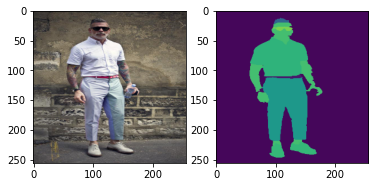

In [3]:
## displaying data loaded by our function
import random
n = random.randint(0,100)
n = 20
plt.subplot(1,2,1)
plt.imshow(framObjTrain['img'][n])
plt.subplot(1,2,2)
plt.imshow(framObjTrain['mask'][n])
plt.show()

In [4]:
## defining our CNN for encoding and decoding

myTransformer = tf.keras.models.Sequential([
## defining encoder 
    tf.keras.layers.Input(shape= (256, 256, 3)),
    tf.keras.layers.Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu', padding = 'same'),
    tf.keras.layers.MaxPool2D(pool_size = (2, 2)),
    
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), strides = (2,2), activation = 'relu', padding = 'valid'),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), strides = (2,2), activation = 'relu', padding = 'same'),
    tf.keras.layers.MaxPool2D(pool_size = (2, 2)),
    
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same'),
    tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding = 'same'),
    tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding = 'same'),
    tf.keras.layers.Conv2D(filters = 256, kernel_size = (3,3), activation = 'relu', padding = 'same'),
    tf.keras.layers.Conv2D(filters = 512, kernel_size = (3,3), activation = 'relu', padding = 'same'),
    
    ## defining decoder path
    tf.keras.layers.UpSampling2D(size = (2,2)),
    tf.keras.layers.Conv2D(filters = 256, kernel_size = (3,3), activation = 'relu', padding = 'same'),
    tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding = 'same'),
    tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding = 'same'),
    tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding = 'same'),
    
    tf.keras.layers.UpSampling2D(size = (2,2)),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same'),
    tf.keras.layers.UpSampling2D(size = (2,2)),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding = 'same'),
    tf.keras.layers.UpSampling2D(size = (2,2)),
    tf.keras.layers.Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu', padding = 'same'),
    tf.keras.layers.Conv2D(filters = 3, kernel_size = (3,3), activation = 'relu', padding = 'same'),
    
    
    
])

In [5]:
myTransformer.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 63, 63, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        3

In [6]:
myTransformer.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 5e-5),
    loss = 'mean_absolute_error',
    metrics = ['acc'])

In [15]:
#Training Data
retVal = myTransformer.fit(np.array(framObjTrain['img']),
                           np.array(framObjTrain['mask']),
                           batch_size=16,
                           epochs = 100
                          )

Epoch 1/100
63/63 [==============================] - 8s 128ms/step - loss: 0.0684 - acc: 0.8841
Epoch 2/100
63/63 [==============================] - 8s 130ms/step - loss: 0.0681 - acc: 0.8841
Epoch 3/100
63/63 [==============================] - 8s 134ms/step - loss: 0.0675 - acc: 0.8841
Epoch 4/100
63/63 [==============================] - 9s 143ms/step - loss: 0.0669 - acc: 0.8841
Epoch 5/100
63/63 [==============================] - 10s 157ms/step - loss: 0.0664 - acc: 0.8841
Epoch 6/100
63/63 [==============================] - 11s 167ms/step - loss: 0.0663 - acc: 0.8842
Epoch 7/100
63/63 [==============================] - 10s 151ms/step - loss: 0.0652 - acc: 0.8842
Epoch 8/100
63/63 [==============================] - 9s 146ms/step - loss: 0.0643 - acc: 0.8842
Epoch 9/100
63/63 [==============================] - 9s 143ms/step - loss: 0.0640 - acc: 0.8842
Epoch 10/100
63/63 [==============================] - 9s 142ms/step - loss: 0.0635 - acc: 0.8842
Epoch 11/100
63/63 [================

KeyboardInterrupt: 

In [ ]:
plt.plot(retVal.history['loss'], label = 'training_loss')
plt.plot(retVal.history['acc'], label = 'training_accuracy')
plt.legend()
plt.grid(True)

In [ ]:
def predict16 (valMap, model, shape = 256):
    ## getting and proccessing val data
    img = valMap['img']
    mask = valMap['mask']
    mask = mask[0:16]
    
    imgProc = img [0:16]
    imgProc = np.array(img)
    
    predictions = model.predict(imgProc)
    for i in range(len(predictions)):
        predictions[i] = cv2.merge((predictions[i,:,:,0],predictions[i,:,:,1],predictions[i,:,:,2]))
    
    return predictions, imgProc, mask


def Plotter(img, predMask, groundTruth):
    plt.figure(figsize=(7,7))
    
    plt.subplot(1,3,1)
    plt.imshow(img)
    plt.title('image')
    
    plt.subplot(1,3,2)
    plt.imshow(predMask)
    plt.title('Predicted Mask')
    
    plt.subplot(1,3,3)
    plt.imshow(groundTruth)
    plt.title('actual Mask')

In [ ]:
sixteenPrediction, actuals, masks = predict16(framObjTrain, myTransformer)

In [ ]:
n_r = random.randint(0,15)

Plotter(actuals[n_r], sixteenPrediction[n_r], masks[n_r])

In [12]:
# show the image, provide window name first
cv2.imshow('image window', sixteenPrediction[n_r])
# add wait key. window waits until user presses a key
cv2.waitKey(0)
# and finally destroy/close all open windows
cv2.destroyAllWindows()

In [13]:
#save_file = 'model.h5'
#myTransformer.save(save_file)